Imports

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Function to plot Confusion Matrix

In [182]:
def plotConfusionMatrix(classifier, X_test, y_test, y_pred, class_names):
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [('Confusion matrix, without normalization', None),('Normalized confusion matrix', 'true')]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    return ;

Read txt file of the tweets set

In [183]:
# Define path to file
path_tweet_set = 'data/SemEval2017-task4-test.subtask-A.english.txt'

# Read file 
corpus_tweets = pd.read_csv(path_tweet_set, encoding='utf8', sep='\t')

# Print (rows, columns)
print('With nan values:', corpus_tweets.shape)

# Drop rows with nan values
corpus_tweets = corpus_tweets.dropna()

# Print (rows, columns) without nan values
print('Without nan values:', corpus_tweets.shape)

# Print head of data
print(corpus_tweets.head())

# Find labels (columns)
labels = corpus_tweets['Label'].unique()

# Print labels
print('Labels:', labels) 

With nan values: (16413, 3)
Without nan values: (16412, 3)
          Tweet index  ...                                         Tweet text
0  801989080477154944  ...  #ArianaGrande Ari By Ariana Grande 80% Full ht...
1  801989272341453952  ...  Ariana Grande KIIS FM Yours Truly CD listening...
2  801990978424962944  ...  Ariana Grande White House Easter Egg Roll in W...
3  801996232553963008  ...  #CD #Musics Ariana Grande Sweet Like Candy 3.4...
4  801998343442407040  ...  SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...

[5 rows x 3 columns]
Labels: ['neutral' 'positive' 'negative']


Convert data into matrix

In [184]:
# Convert data into a matrix of TF-IDF features
vectorizer = TfidfVectorizer(norm=None, stop_words='english', max_df=0.95, min_df=2)
tfidf = vectorizer.fit_transform(corpus_tweets['Tweet text'])

# Print matrix (rows, columns)
print(tfidf.shape)

(16412, 17924)


Split dataset into training and test sets

In [185]:
X = tfidf;
y = corpus_tweets['Label'];

# Split matrix into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


Classification by means of Support Vector Machine

Classification report for SVM: 
              precision    recall  f1-score   support

    negative       1.00      0.39      0.56      2250
     neutral       0.58      1.00      0.74      3096
    positive       1.00      0.29      0.45      1219

    accuracy                           0.66      6565
   macro avg       0.86      0.56      0.58      6565
weighted avg       0.80      0.66      0.62      6565

Confusion matrix for SVM: 
[[ 884 1366    0]
 [   3 3093    0]
 [   0  861  358]]
Confusion matrix, without normalization
[[ 884 1366    0]
 [   3 3093    0]
 [   0  861  358]]
Normalized confusion matrix
[[ 884 1366    0]
 [   3 3093    0]
 [   0  861  358]]


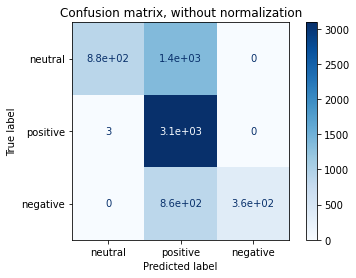

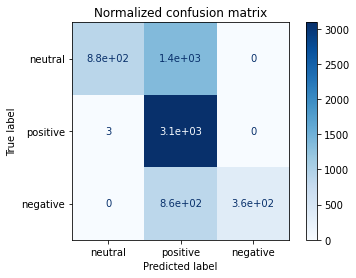

In [186]:
# Define a Support Vector Machine classifier 
svm_clf = SVC(kernel='rbf', gamma=0.25, C=1000)

# Create a classifier using train data
svm_clf.fit(X_train, y_train)

# Predict labels using test data
y_true, y_pred = y_test, svm_clf.predict(X_test)

# Print a text report showing the main classification metrics
print('Classification report for SVM: ')
print(classification_report(y_true, y_pred))

# Print Confusion Matrix
print('Confusion matrix for SVM: ')
print(confusion_matrix(y_true, y_pred))

# Plot Confusion Matrix
plotConfusionMatrix(svm_clf, X_test, y_test, y_pred, labels)

Classification by means of Artificial Neural Network: Feed-forward Backpropagation Multilayer Perceptron

Classification report for MLP: 
              precision    recall  f1-score   support

    negative       0.78      0.75      0.76      2250
     neutral       0.74      0.77      0.75      3096
    positive       0.69      0.65      0.67      1219

    accuracy                           0.74      6565
   macro avg       0.73      0.72      0.73      6565
weighted avg       0.74      0.74      0.74      6565

Confusion matrix for MLP: 
[[1686  488   76]
 [ 423 2388  285]
 [  59  365  795]]
Confusion matrix, without normalization
[[1686  488   76]
 [ 423 2388  285]
 [  59  365  795]]
Normalized confusion matrix
[[1686  488   76]
 [ 423 2388  285]
 [  59  365  795]]


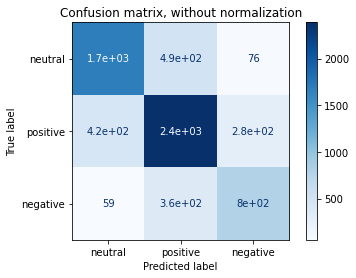

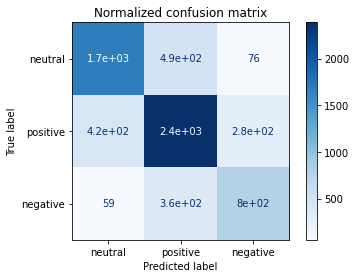

In [187]:
# Define a Multilayer Perceptron classifier
mlp_clf = MLPClassifier(hidden_layer_sizes= 12, max_iter= 1100, random_state= 6, solver= 'sgd')

# Create a classifier using train data
mlp_clf.fit(X_train, y_train)

# Predict labels using test data
y_true, y_pred = y_test, mlp_clf.predict(X_test)

# Print a text report showing the main classification metrics
print('Classification report for MLP: ')
print(classification_report(y_true, y_pred))

# Print Confusion Matrix
print('Confusion matrix for MLP: ')
print(confusion_matrix(y_true, y_pred))

# Plot Confusion Matrix
plotConfusionMatrix(mlp_clf,X_test,y_test,y_pred,labels)

Naive Bayes Classification

Detailed classification report for NB: 
              precision    recall  f1-score   support

    negative       0.72      0.78      0.75      2250
     neutral       0.77      0.59      0.67      3096
    positive       0.53      0.75      0.62      1219

    accuracy                           0.69      6565
   macro avg       0.67      0.71      0.68      6565
weighted avg       0.71      0.69      0.69      6565

Confusion matrix for NB: 
[[1754  326  170]
 [ 608 1834  654]
 [  91  216  912]]
Confusion matrix, without normalization
[[1754  326  170]
 [ 608 1834  654]
 [  91  216  912]]
Normalized confusion matrix
[[1754  326  170]
 [ 608 1834  654]
 [  91  216  912]]


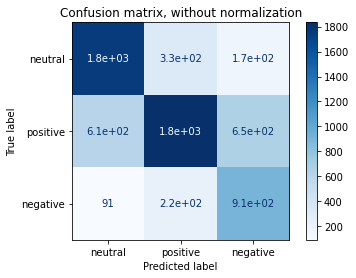

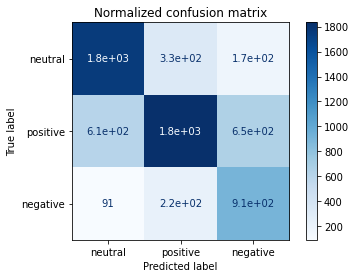

In [188]:
# Define a Naive Bayes classifier
gnb_clf = MultinomialNB()

# Create a classifier using train data
gnb_clf.fit(X_train, y_train)

# Predict labels using test data
y_pred = gnb_clf.predict(X_test)

# Print a text report showing the main classification metrics
print('Detailed classification report for NB: ')
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print('Confusion matrix for NB: ')
print(confusion_matrix(y_true, y_pred))

# Plot Confusion Matrix
plotConfusionMatrix(gnb_clf,X_test,y_test,y_pred,labels)

Random forest classifier

Detailed classification report for RF: 
              precision    recall  f1-score   support

    negative       0.81      0.66      0.73      2250
     neutral       0.70      0.82      0.75      3096
    positive       0.70      0.64      0.67      1219

    accuracy                           0.73      6565
   macro avg       0.74      0.71      0.72      6565
weighted avg       0.74      0.73      0.73      6565

Confusion matrix for RF: 
[[1482  693   75]
 [ 307 2526  263]
 [  36  401  782]]
Confusion matrix, without normalization
[[1482  693   75]
 [ 307 2526  263]
 [  36  401  782]]
Normalized confusion matrix
[[1482  693   75]
 [ 307 2526  263]
 [  36  401  782]]


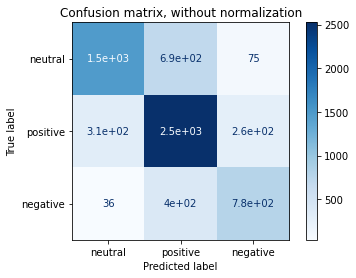

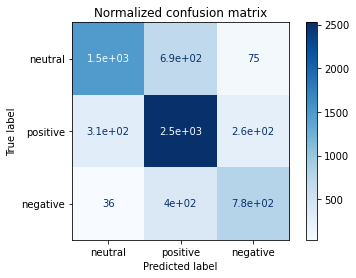

In [189]:
# Define a Random Forest classifier
rfc_clf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

# Create a classifier using train data
rfc_clf.fit(X_train, y_train)

# Predict labels using test data
y_pred = rfc_clf.predict(X_test)

# Print a text report showing the main classification metrics
print('Detailed classification report for RF: ')
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print('Confusion matrix for RF: ')
print(confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
plotConfusionMatrix(rfc_clf,X_test,y_test,y_pred,labels)

K-Nearest Neighbors Classifier

Detailed classification report for KNN: 
              precision    recall  f1-score   support

    negative       0.64      0.06      0.11      2250
     neutral       0.51      0.23      0.31      3096
    positive       0.20      0.82      0.32      1219

    accuracy                           0.28      6565
   macro avg       0.45      0.37      0.25      6565
weighted avg       0.50      0.28      0.25      6565

Confusion matrix for KNN: 
[[ 139  466 1645]
 [  70  704 2322]
 [   8  211 1000]]
Confusion matrix, without normalization
[[ 139  466 1645]
 [  70  704 2322]
 [   8  211 1000]]
Normalized confusion matrix
[[ 139  466 1645]
 [  70  704 2322]
 [   8  211 1000]]


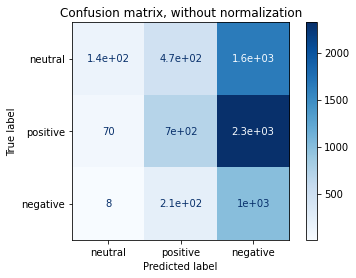

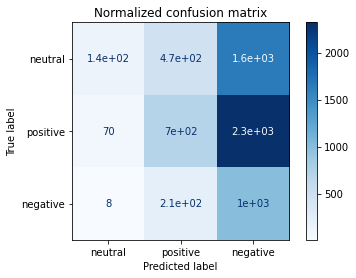

In [190]:
# Define a K-Nearest Neighbors classifier
rfc_clf = KNeighborsClassifier() 

# Create a classifier using train data
rfc_clf.fit(X_train, y_train)

# Predict labels using test data
y_pred = rfc_clf.predict(X_test)

# Print a text report showing the main classification metrics
print('Detailed classification report for KNN: ')
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print('Confusion matrix for KNN: ')
print(confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
plotConfusionMatrix(rfc_clf,X_test,y_test,y_pred,labels)

Decision Tree Classifier

Detailed classification report for DT: 
              precision    recall  f1-score   support

    negative       0.73      0.69      0.71      2250
     neutral       0.71      0.72      0.72      3096
    positive       0.60      0.65      0.62      1219

    accuracy                           0.70      6565
   macro avg       0.68      0.69      0.68      6565
weighted avg       0.70      0.70      0.70      6565

Confusion matrix for DT: 
[[1550  545  155]
 [ 500 2233  363]
 [  80  352  787]]
Confusion matrix, without normalization
[[1550  545  155]
 [ 500 2233  363]
 [  80  352  787]]
Normalized confusion matrix
[[1550  545  155]
 [ 500 2233  363]
 [  80  352  787]]


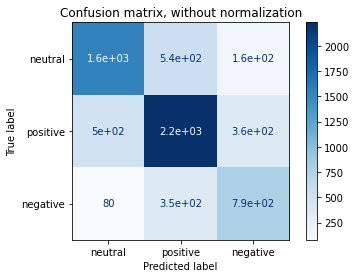

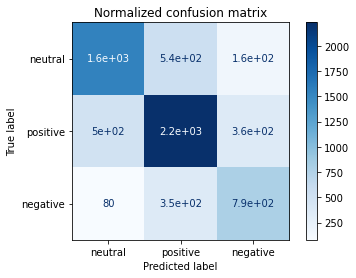

In [191]:
# Define a Decision Tree classifier
rfc_clf = DecisionTreeClassifier() 

# Create a classifier using train data
rfc_clf.fit(X_train, y_train)

# Predict labels using test data
y_pred = rfc_clf.predict(X_test)

# Print a text report showing the main classification metrics
print('Detailed classification report for DT: ')
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print('Confusion matrix for DT: ')
print(confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
plotConfusionMatrix(rfc_clf,X_test,y_test,y_pred,labels)